# Analyzing Constituent Values

Here, we will analyze the constituent values of the dataset to get a better sense on the state of water quality in the San Francsico Bay. Here is a list of all the constituents recorded in the dataframe that we will analyze: 
* Discrete Cholorophyll-a
* Calculated Cholorophyll
* Discrete Oxygen
* Calculated Oxygen
* Discrete SPM
* Calculated SPM
* Extinction Coefficient
* Salinity
* Temperature
* Nitrite
* Ammonium
* Phosphate

Discrete values are the recorded values conducted by USGS in their trials of examining water at particular stations; in contrast, calculated values are estimated concentrations of the constituent at different levels of depth and numerous stations. We will focus on the calculated values of the constituent. For this quick summary report, I won't be analyzing each station (there are 34 stations in total!), and I found it best to group some stations in 4 regions when I wanted to investigate summary statistics for particular places around the bay. These regions will be Suisun Bay, the San Pablo Bay, the Central Bay, and the South Bay (the latter two geographically belong in the San Francisco Bay). 

Below is the map of the San Francisco Bay including the Suisun Bay and the San Pablo Bay 

![](stationMaps.PNG "Title")

First let's import the cleaned_data set:

In [1]:
import pandas as pd
waterQuality = pd.read_pickle("waterQualityData.pkl")
waterQuality['Value'] = pd.to_numeric(waterQuality['Value'])

I created 4 lists for each of the regions that I've pre-defined. Region A will consist of stations in the Suisan Bay located near Martinez, CA and Pittsburg.  Region B includes station sites in the San Pablo Bay, which encompasses areas near Rodeo, CA down to the Richmond-San Rafael Bridge. Region C includes the northern portion of the San Francisco Bay, including areas near Treasure Island down to Hunter's point. Region D includes areas near SFO/San Bruno, CA down to the San Mateo Bridge. Finally, Region E surrounds the bottom portion of the San Francisco Bay, including areas surrounding the Dumbarton Bridge. 

### List of Stations:
Region A:
* 3: Pittsburg
* 4: Simmons Point
* 5: Middle Ground
* 6: Roe Island 
* 7: Avon Pier 

Region B:
* 11: Mare Island
* 12: Pinole Shoal
* 13: North of Pinole Point
* 14: "Echo" Buoy
* 15: Point San Pablo

Region C:
* 18: Point Blunt
* 20: Blossom Rock
* 21: Bay Bridge
* 22: Potrero Point
* 23: Hunter's Point

Region D:
* 26: San Bruno Shoal
* 27: San Francisco Airport
* 28: North of San Mateo Bridge 
* 29: South of San Mateo Bridge
* 30: Redwood Creek

Region E: 
* 31: Coyote Hills
* 32: Ravenswood Point
* 33: Dumbarton Bridhe
* 34: Newark Slough
* 35: Mowry Slough

In [2]:
# Initialize lists that contain the corresponding stations beloning in each region. 
regionA = [3.0, 4.0, 5.0, 6.0, 7.0]
regionB = [11.0, 12.0, 13.0, 14.0, 15.0]
regionC = [18.0, 20.0, 21.0, 22.0, 23.0]
regionD = [26.0, 27.0, 28.0, 29.0, 30.0]
regionE = [31.0, 32.0, 33.0, 34.0, 35.0]

## Cholorophyll

We will first analyze calculated cholorophyll. The values of this constituent were estimated through peforming linear regression between fluorometer voltages calculated from a fluorometer (a device used to measure  fluorescence/light) and using this output (fluorometer voltages) with the discrete measures of chlorophyll. Let's first analyze the cholorophyll concentration on a case-by-region basis. 

In [2]:
from analysisMethods import monthlyMean
from analysisMethods import monthlyMeanPlot
import matplotlib.pyplot as plt
chloro = 'Calculated Chlorophyll [mg/m3]'

# Creating the groupby objects
year2014 = waterQuality.loc['2014-01-01':'2014-12-31'].groupby(['Station Number', 'Constituent'])
year2015 = waterQuality.loc['2015-01-01':'2015-12-31'].groupby(['Station Number', 'Constituent'])
year2016 = waterQuality.loc['2016-01-01':'2016-12-31'].groupby(['Station Number', 'Constituent'])
year2017 = waterQuality.loc['2017-01-01':'2017-12-31'].groupby(['Station Number', 'Constituent'])
year2018 = waterQuality.loc['2018-01-01':'2018-12-31'].groupby(['Station Number', 'Constituent'])

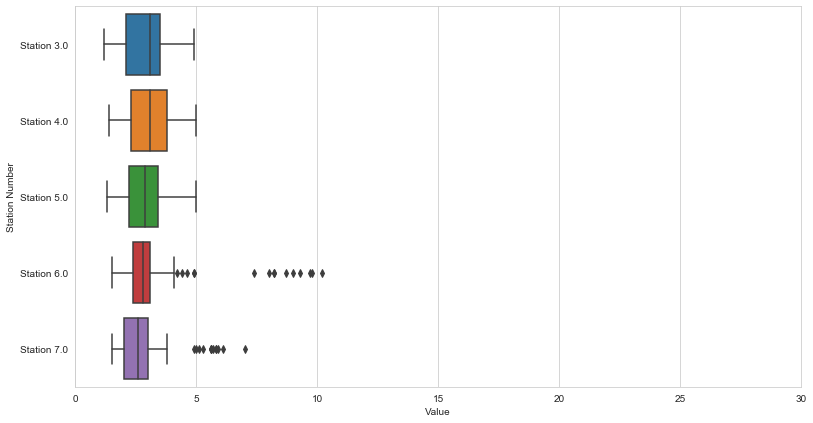

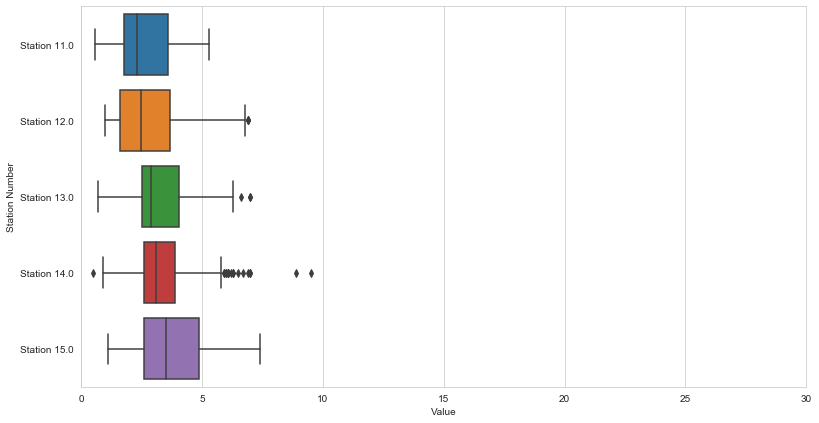

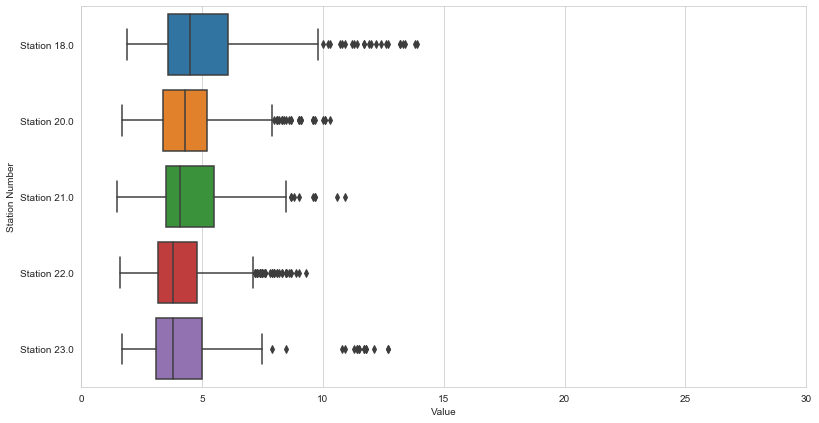

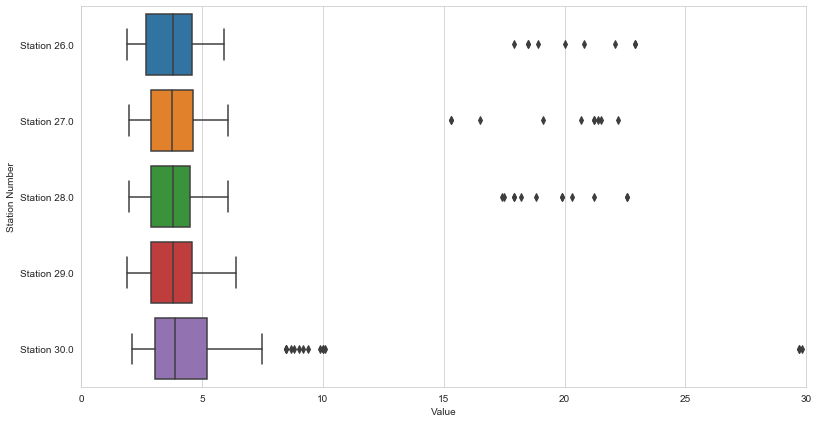

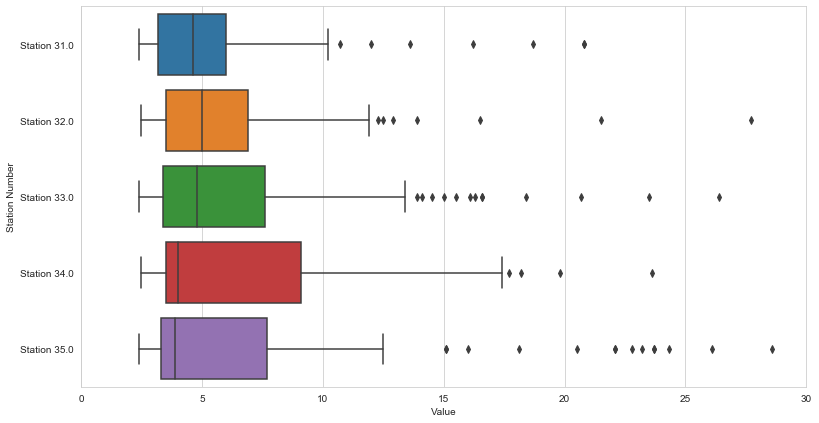

In [4]:
from analysisMethods import stationSwarmPlot
for region in [regionA, regionB, regionC, regionD, regionE]:
    stationSwarmPlot(year2018, region, chloro)

Since I wanted to have a quick glance over the differences in distribution of chlorophyll concentration values across diferent regions, I wanted to compare and contrast the regions in the most recent year using data from 2018. This snapshot shows how regionA and regionB appear to look similar, although regionB has a slightly larger range of values where it seems to have values that fall around its third quartile that is slightly higher than region A. RegionC has an even larger range of values than the former 2, including several outliers that exceed the values found in regionA and B. However, regionD slightly mirrors regionA and regionB, yet it possesses values that are exceed A, B, and C. Finally, one can notice that region E contains the highest max, highest 3rd quartile, and outliers that far exceed many values of the former four regions. 

In [7]:
for region in [regionA, regionB, regionC, regionD, regionE]:
    for station in region:
        print("Median: " + str(year2018.get_group((station, chloro))['Value'].median()) + ", " + "Max: " +str(year2018.get_group((station, chloro))['Value'].max()))
    print("\n")

Median: 3.1, Max: 4.9
Median: 3.1, Max: 5.0
Median: 2.9, Max: 5.0
Median: 2.8, Max: 10.2
Median: 2.6, Max: 7.0


Median: 2.3, Max: 5.3
Median: 2.5, Max: 6.9
Median: 2.9, Max: 7.0
Median: 3.1, Max: 9.5
Median: 3.5, Max: 7.4


Median: 4.5, Max: 13.9
Median: 4.3, Max: 10.3
Median: 4.1, Max: 10.9
Median: 3.8, Max: 9.3
Median: 3.8, Max: 12.7


Median: 3.8, Max: 22.9
Median: 3.75, Max: 22.2
Median: 3.8, Max: 22.6
Median: 3.8, Max: 45.5
Median: 3.9, Max: 32.0


Median: 4.65, Max: 50.0
Median: 5.0, Max: 59.8
Median: 4.8, Max: 70.3
Median: 4.0, Max: 100.5
Median: 3.9, Max: 32.1




In 2018, region A clearly has the lowest median values by station, followed by region B; the other three regions had slightly higher median values, where Region E seems to have among the highest out of all regions. From these quick snapshots, it seems that regions A and B contain the lowest cholorohyll concentrations among the regions, whereas regions D and E contain the highest

Let's also quickly analyze depth:

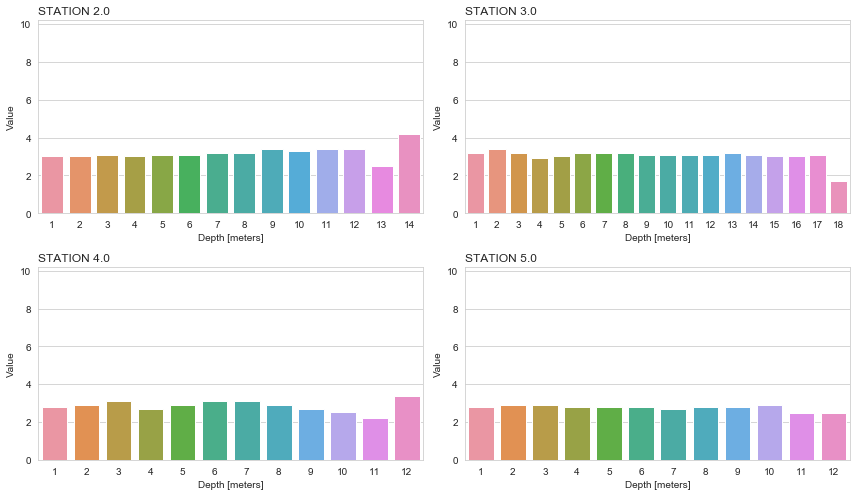

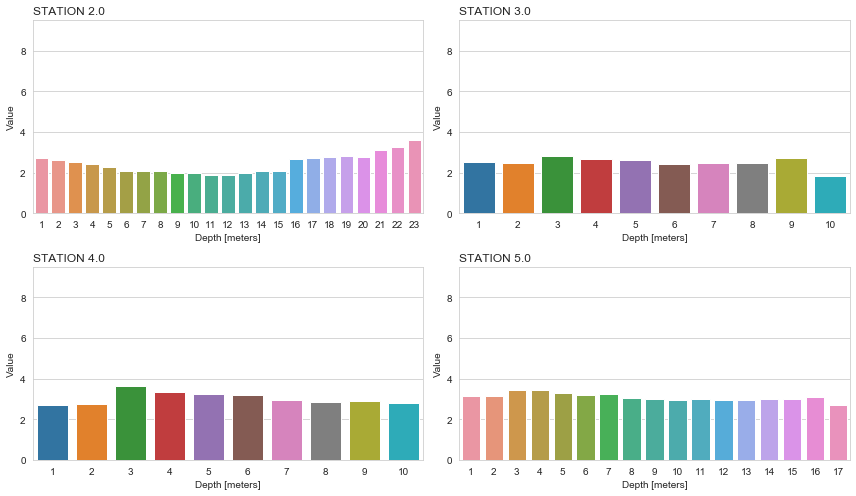

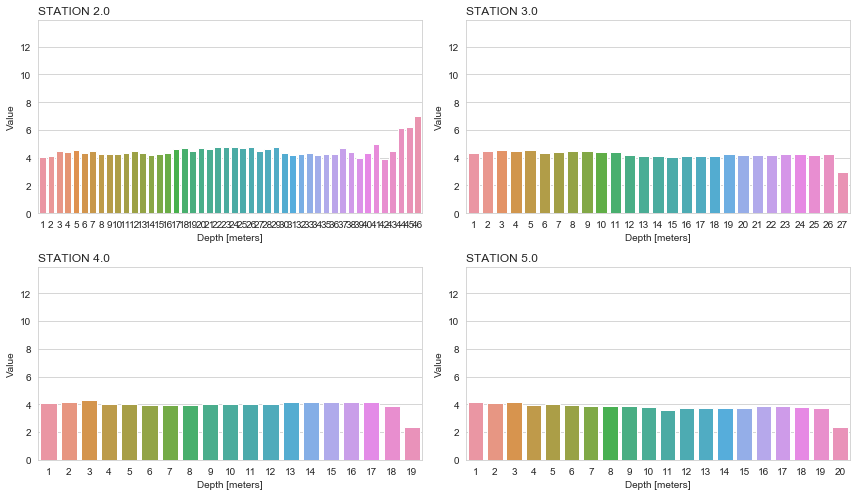

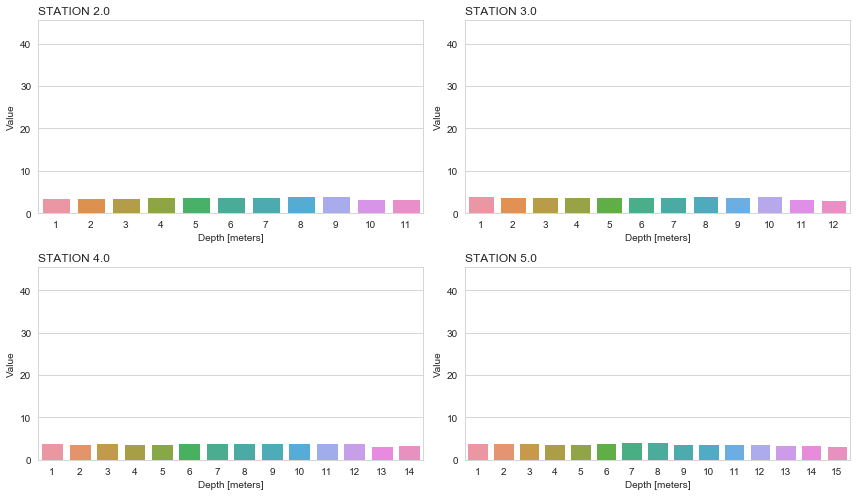

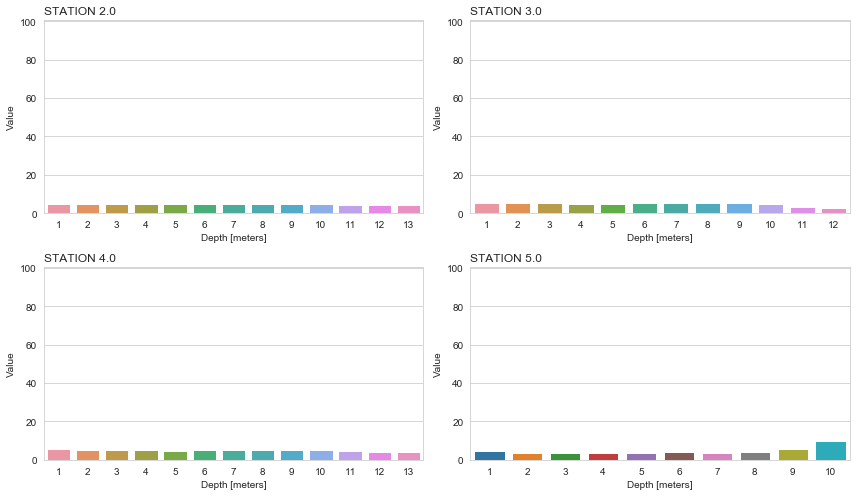

In [45]:
from analysisMethods import stationDepthPlots
for region in [regionA, regionB, regionC, regionD, regionE]:
    stationDepthPlots(year2018, region, chloro)

After graphing the concentration values by depth, it seems to be similar within each station. Note that each station has different concentrations at different levels of depth. Thus, there might not be any interesting associations between concentration and the meters of depth down the water the concentration was taken in. Furthermore, it seems that, for an individual station, the levlel of chlorophyll concentration doesn't seem to change that much when measured meters below the water surface. 

In [35]:
# created a quick function to calculate upperIQR value
def upperIQR(yearGroup, station, constituent):
    iqr = (1.5*(yearGroup.get_group((station, constituent))['Value'].quantile(0.75)) - (yearGroup.get_group((station,
    constituent))['Value'].quantile(0.25))) + (yearGroup.get_group((station, constituent))['Value'].quantile(0.75))
    return iqr

The highest median belonged to station 31 in region E. Let's quickly see a snapshot of its outliers. 

In [44]:
year2018.get_group((31.0, chloro)).loc[year2018.get_group((31.0, chloro))['Value'] > (upperIQR(year2018, 31.0, chloro))]

,Depth [meters],Coordinates,Value
Date MM/DD/YYYY,,,
2018-04-09,1,"(37 31.7', -122 9.5')",20.8
2018-04-09,2,"(37 31.7', -122 9.5')",20.8
2018-04-09,3,"(37 31.7', -122 9.5')",18.7
2018-04-09,4,"(37 31.7', -122 9.5')",16.2
2018-04-09,5,"(37 31.7', -122 9.5')",13.6
2018-04-09,6,"(37 31.7', -122 9.5')",12.0
2018-04-18,1,"(37 31.7', -122 9.5')",44.0
2018-04-18,2,"(37 31.7', -122 9.5')",44.0
2018-04-18,3,"(37 31.7', -122 9.5')",42.9


It's quite interesting to see that most of these occur during Apirl. In fact, the highest cholorophyll concentrations seem to occur this time (from March to May).

In [6]:
year2014Chloro = monthlyMean(year2014, chloro)
year2015Chloro = monthlyMean(year2015, chloro)
year2016Chloro = monthlyMean(year2016, chloro)
year2017Chloro = monthlyMean(year2017, chloro)
year2018Chloro = monthlyMean(year2018, chloro)

I thought what was most interesting is how big spikes of cholrophyll conentration in the waters occur begin in summer. From analyzing the average and medium concentration of cholrophyll in a monthly-basis after each year, it wasn't quite surprising to see that the summer time saw an increase of this constituent. 

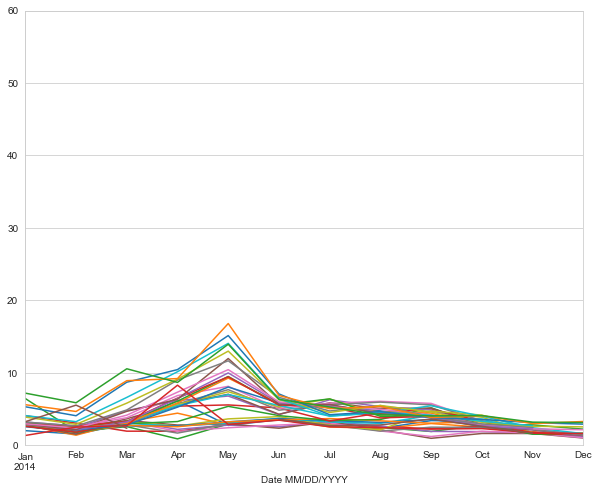

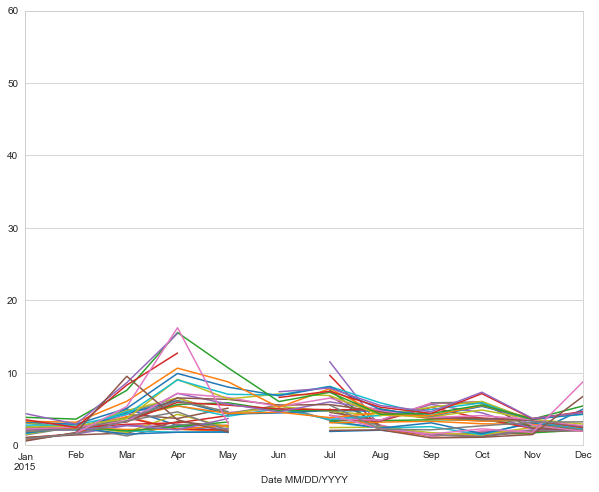

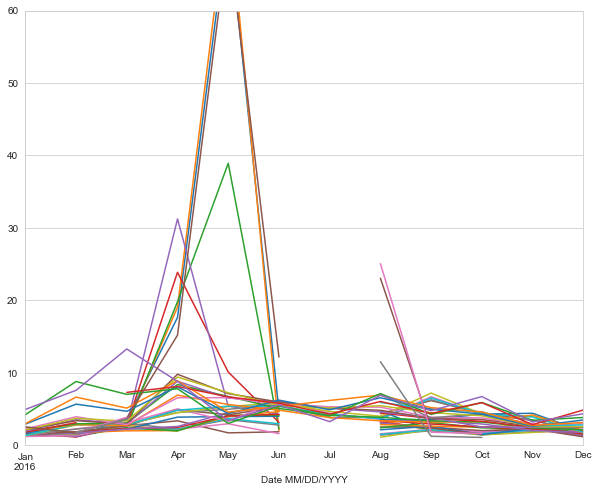

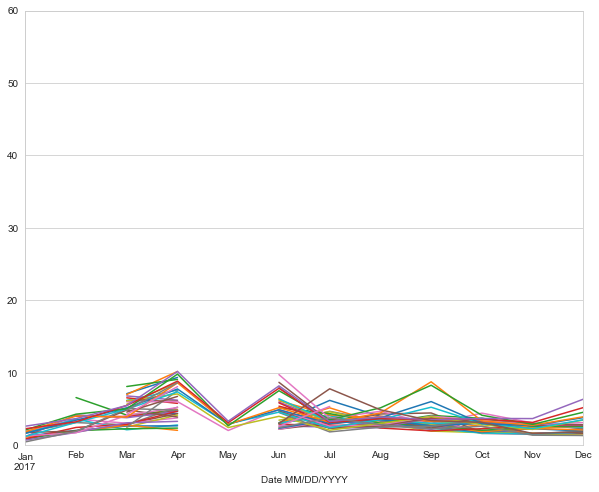

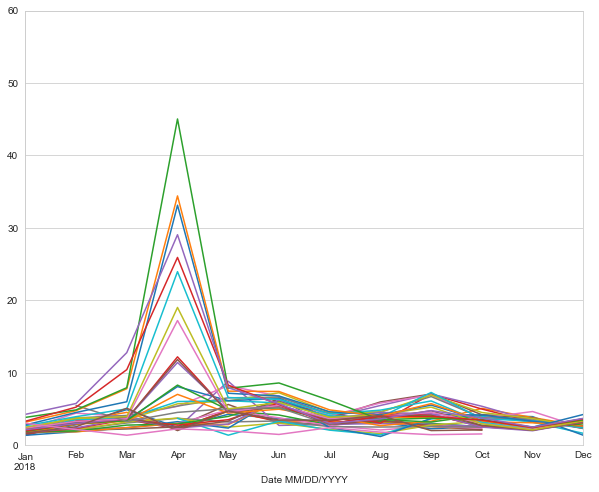

In [47]:
for year in [year2014Chloro, year2015Chloro, year2016Chloro, year2017Chloro, year2018Chloro]:
    monthlyMeanPlot(year)

Though we don't necessarily care about the individual lines themselves, we decided to plot all station lines so we may infer which times of the year usually undergo spikes in cholorophyll concentration. Besides 2017, each year saw an increase in concentration from March to May and demonstrated the greatest amount of deviance from the overall trend, coupled with a decreasing trend towards the monthly mean after May. Furthermore, we also see a slight increase, though not as drastic, from August to October. Thus, I hypothesized that Sprng and late summer were time periods were when cholorophyll concentration increased, possbily due to temperatures. Furthermore, I decided to then investigate and analyze water temperature during the peak periods for cholrophyll. 

In [10]:
temp = "Temperature [°C]"

year2014Temp = monthlyMean(year2014, temp)
year2015Temp = monthlyMean(year2015, temp)
year2016Temp = monthlyMean(year2016, temp)
year2017Temp = monthlyMean(year2017, temp)
year2018Temp = monthlyMean(year2018, temp)

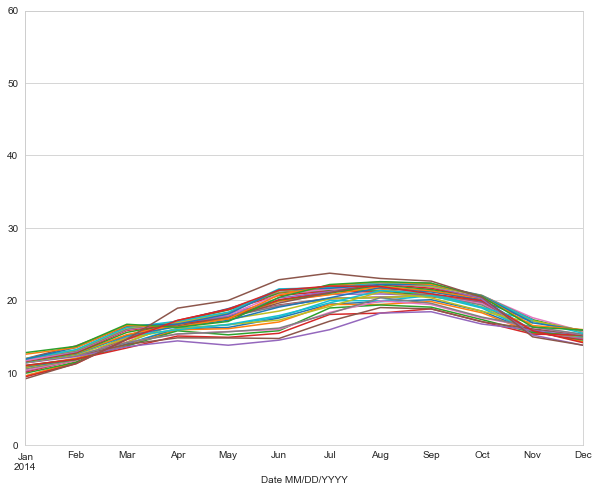

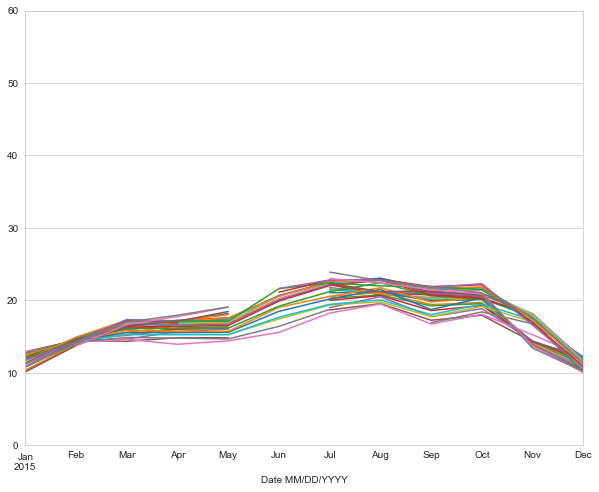

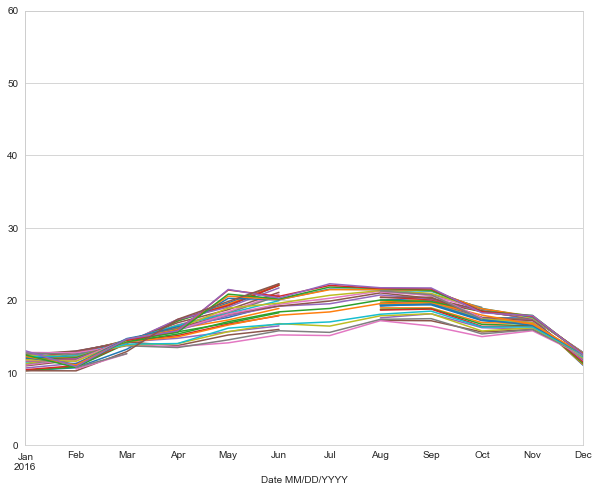

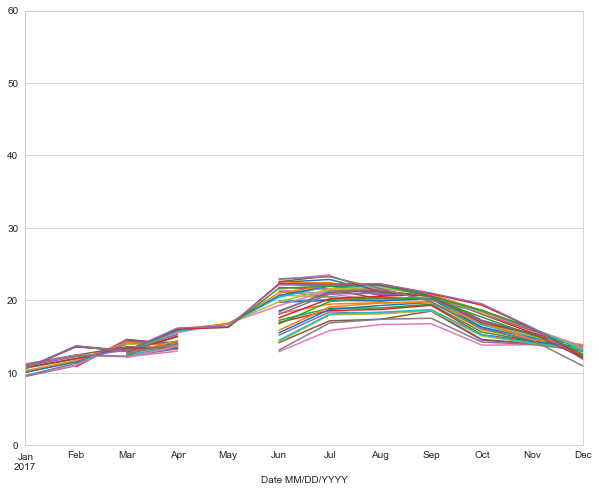

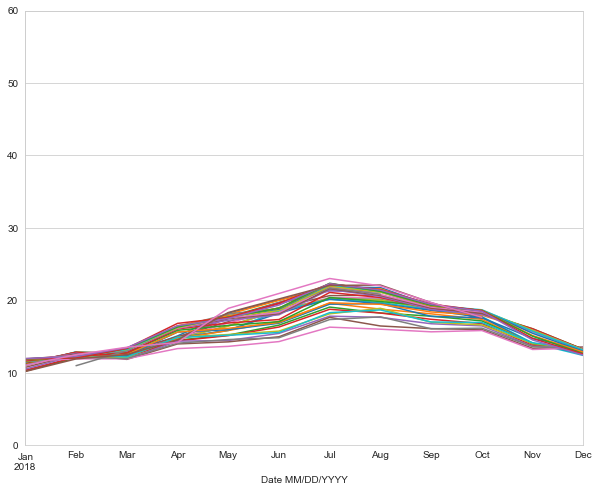

In [11]:
for year in [year2014Temp, year2015Temp, year2016Temp, year2017Temp, year2018Temp]:
    monthlyMeanPlot(year)

From examining the monthly mean plots of temperature, it's not surprising that June and July is the time when temperatures peak. What seems more interesting is to see that during the months of March, April, and May, there aren't any identifiable patterns based on the plots that can give more insight on what may cause the sharp rise in chlorophyll concentration around this time. 

A possible constituent that could provide insights is calculated oxygen. This was estimated from the concentration of dissolved oxygen calculaed from an electrode voltage output which was calibrated using linear regression with the discrete measure of dissolved oxygen. The electrode voltage output OXYG indicates the relative measure of concentration of dissolved oxygen in the water. Dissolved oxygen is necessary to many forms of aquatic fauna, yet high or low levels can disrupt aquatic life and worsen water quality. 

First, plot the montly means of calculated oxygen. 

In [20]:
calcoxy = "Calculated Oxygen [mg/L]"

year2014Coxyg = monthlyMean(year2014, calcoxy)
year2015Coxyg = monthlyMean(year2015, calcoxy)
year2016Coxyg = monthlyMean(year2016, calcoxy)
year2017Coxyg = monthlyMean(year2017, calcoxy)
year2018Coxyg = monthlyMean(year2018, calcoxy)

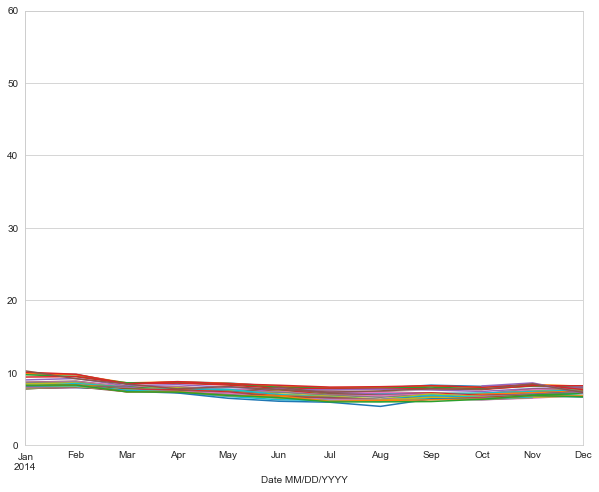

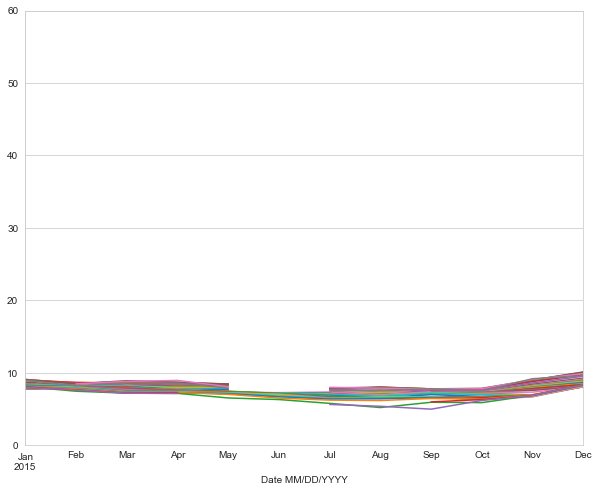

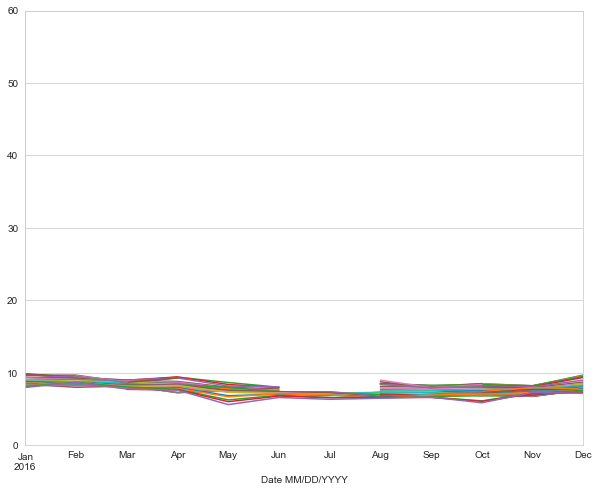

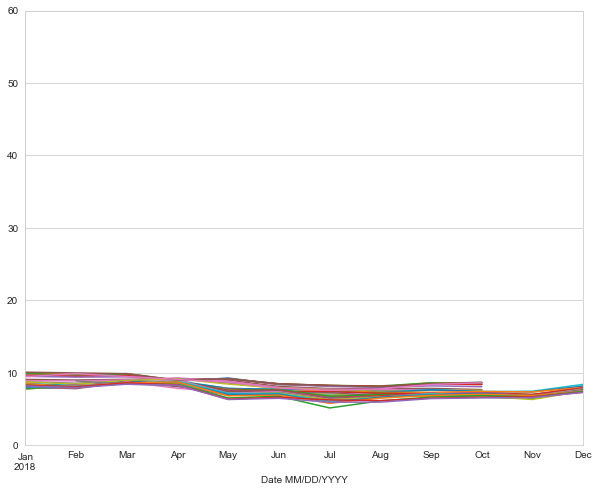

In [21]:
for year in [year2014Coxyg, year2015Coxyg, year2016Coxyg, year2018Coxyg]:
    monthlyMeanPlot(year)